## Compare Fat Globule Phenotypes

**Gregory Way, 2019**

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats

import plotnine as gg

In [2]:
def compare_groups(df, ffa, day, features):
    # Perform an independent t-test for given combination of ffa and day
    day = str(day)
    ffa = int(ffa)
    comp_df = (
        df
        .query("Metadata_FFA == @ffa")
        .query("Metadata_diff_day == @day")
        .reset_index(drop=True)
    )
    a_df = comp_df.query("Metadata_category == 1").loc[:, cp_features].reset_index(drop=True)
    b_df = comp_df.query("Metadata_category == 0").loc[:, cp_features].reset_index(drop=True)
    
    t_stat, p_val = stats.ttest_ind(a=a_df, b=b_df)
    
    t_result_df = pd.DataFrame(t_stat).transpose()
    t_result_df.columns = cp_features
    t_result_df = t_result_df.melt().rename({"value": "t_stat",
                                             "variable": "cp_feature"}, axis="columns")

    p_result_df = pd.DataFrame(p_val).transpose()
    p_result_df.columns = cp_features
    p_result_df = p_result_df.melt().rename({"value": "p_val",
                                             "variable": "cp_feature"}, axis="columns")


    result_df = (
        t_result_df
        .merge(p_result_df, on="cp_feature")
        .assign(FFA=ffa, diff_day=day)
        .sort_values(by="cp_feature")
        .reset_index(drop=True)
    )

    return result_df

In [3]:
# Load labels
file = os.path.join("data", "category_labels.csv")
label_df = pd.read_csv(file)
label_df.columns = ["Metadata_{}".format(x) for x in label_df.columns]

label_df

,Metadata_T2D_bin,Metadata_quantile_T2D,Metadata_percentile_T2D,Metadata_rank_T2D,Metadata_percentile_HOMA-IR,Metadata_rank_HOMA-IR,Metadata_IID,Metadata_category
0,0,NaN,87.50,161.0,47.83,88,m164,1
1,1,NaN,81.52,150.0,80.43,148,m246,1
2,1,NaN,23.91,44.0,39.67,73,m252,0
3,0,0.0,38.32,70.5,93.48,172,m266,1
4,1,0.0,57.61,106.0,8.70,16,m270,0
5,1,NaN,92.39,170.0,79.35,146,m272,1
6,0,NaN,93.48,172.0,16.85,31,m276,0


In [4]:
# Load profiles
file = os.path.join("data", "batch1_batch3_combined_normalized_variable_selected.tsv")
df = pd.read_csv(file, sep='\t').drop(["Metadata_Plate",
                                       "Metadata_Assay_Plate_Barcode",
                                       "Metadata_well_position"], axis="columns")

print(df.shape)
df.head()

(850, 686)


,Metadata_Well,Metadata_Plate_Map_Name,Metadata_cell_line,Metadata_patient,Metadata_FFA,Metadata_diff_day,Metadata_Batch,Cytoplasm_Location_MaxIntensity_Y_AGP,Cells_Texture_InfoMeas1_DNA_10_01,Nuclei_Texture_Correlation_AGP_10_00,...,Cytoplasm_Location_MaxIntensity_Y_Mito,Nuclei_Texture_SumVariance_DNA_5_01,Cells_Texture_InfoMeas2_AGP_20_01,Cells_RadialDistribution_RadialCV_BODIPY_1of4,Cells_Texture_InfoMeas2_DNA_10_01,Cells_Intensity_MaxIntensityEdge_BODIPY,Cytoplasm_Location_MaxIntensity_X_Mito,Cells_Texture_InfoMeas1_DNA_20_03,Nuclei_Granularity_7_DNA,Cytoplasm_RadialDistribution_MeanFrac_DNA_2of4
0,B02,BR00101080,vc,PAC_261,0,3,batch_one,1.981588,-0.153228,0.335579,...,1.907583,-0.933082,-3.246929,2.389856,-1.889566,-1.226239,0.964993,1.344137,-0.005601,1.186655
1,B03,BR00101080,sc,PAC_246,0,3,batch_one,0.736176,0.971205,0.383971,...,0.668772,-0.872465,-0.535260,-1.562283,-0.224629,-0.420212,-0.330985,-0.753028,-0.562173,-0.723367
2,B04,BR00101080,vc,PAC_246,0,3,batch_one,1.841042,1.019402,-0.479397,...,1.683743,-0.268620,-0.970252,0.863549,-0.892765,-1.084959,0.389162,0.644120,-0.663417,0.683580
3,B05,BR00101080,sc,PAC_266,0,3,batch_one,1.882196,0.986307,-0.430205,...,1.755002,-0.402182,0.029447,0.129577,-0.778745,-0.917244,1.876155,0.299807,-0.728304,-0.016313
4,B06,BR00101080,vc,PAC_266,0,3,batch_one,2.570122,0.338204,0.641780,...,2.293986,-0.989368,-2.319102,0.193942,-1.466770,-1.080506,-1.273694,0.872473,0.764158,0.584973


In [5]:
aggregate_cols = ["Metadata_Plate_Map_Name", "Metadata_cell_line", "Metadata_patient",
                  "Metadata_FFA", "Metadata_diff_day", "Metadata_Batch"]

agg_df = df.groupby(aggregate_cols).mean().reset_index()
agg_df.loc[:, "Metadata_patient"] = ["m{}".format(x.strip("PAC_")) for x in agg_df.Metadata_patient]

# Merge labels
group_df = label_df.merge(agg_df, left_on="Metadata_IID", right_on="Metadata_patient", how="inner")

print(group_df.shape)
group_df.head()

(172, 693)


,Metadata_T2D_bin,Metadata_quantile_T2D,Metadata_percentile_T2D,Metadata_rank_T2D,Metadata_percentile_HOMA-IR,Metadata_rank_HOMA-IR,Metadata_IID,Metadata_category,Metadata_Plate_Map_Name,Metadata_cell_line,...,Cytoplasm_Location_MaxIntensity_Y_Mito,Nuclei_Texture_SumVariance_DNA_5_01,Cells_Texture_InfoMeas2_AGP_20_01,Cells_RadialDistribution_RadialCV_BODIPY_1of4,Cells_Texture_InfoMeas2_DNA_10_01,Cells_Intensity_MaxIntensityEdge_BODIPY,Cytoplasm_Location_MaxIntensity_X_Mito,Cells_Texture_InfoMeas1_DNA_20_03,Nuclei_Granularity_7_DNA,Cytoplasm_RadialDistribution_MeanFrac_DNA_2of4
0,0,NaN,87.5,161.0,47.83,88,m164,1,BR00101075,sc,...,1.268711,8.989881,0.252062,-0.033392,0.769578,1.097694,-0.104550,-0.197015,-0.794045,-0.906404
1,0,NaN,87.5,161.0,47.83,88,m164,1,BR00101075,sc,...,1.218710,7.780674,0.398587,-0.490359,0.556511,1.060573,0.359228,0.053509,-0.778571,-1.096930
2,0,NaN,87.5,161.0,47.83,88,m164,1,BR00101075,vc,...,0.333372,-0.480535,-1.215828,-0.522574,-0.873557,-0.707854,-0.728552,0.656116,-0.665698,-0.370408
3,0,NaN,87.5,161.0,47.83,88,m164,1,BR00101075,vc,...,0.331901,0.460727,0.161477,1.988542,-0.105546,0.162681,-0.500688,0.112063,0.729233,0.702660
4,0,NaN,87.5,161.0,47.83,88,m164,1,BR00101076,sc,...,0.712356,4.055342,-0.006899,0.071617,0.455998,0.971524,0.072916,-0.036079,-0.929129,-0.551026


In [6]:
bodipy_features = [x for x in group_df.columns if "BODIPY" in x]

print(len(bodipy_features))
bodipy_features

205


['Cytoplasm_Texture_InverseDifferenceMoment_BODIPY_5_00',
 'Cells_Mean_SmallBODIPYObjects_AreaShape_Orientation',
 'Cells_Texture_Correlation_BODIPY_20_01',
 'Cytoplasm_Correlation_Correlation_BODIPY_AGP',
 'Cytoplasm_Texture_AngularSecondMoment_BODIPY_20_01',
 'Cells_Correlation_K_BODIPY_DNA',
 'Cytoplasm_RadialDistribution_MeanFrac_BODIPY_3of4',
 'Nuclei_Texture_SumVariance_BODIPY_20_03',
 'Nuclei_Granularity_11_BODIPY',
 'Cytoplasm_RadialDistribution_FracAtD_BODIPY_1of4',
 'Nuclei_RadialDistribution_RadialCV_BODIPY_4of4',
 'Cells_Mean_SmallBODIPYObjects_Correlation_Costes_AGP_Mito',
 'Nuclei_RadialDistribution_RadialCV_BODIPY_2of4',
 'Cells_Mean_SmallBODIPYObjects_Granularity_9_BODIPY',
 'Nuclei_Granularity_12_BODIPY',
 'Cells_Mean_SmallBODIPYObjects_Correlation_K_DNA_BODIPY',
 'Nuclei_Texture_Correlation_BODIPY_10_01',
 'Nuclei_Texture_Correlation_BODIPY_20_00',
 'Cytoplasm_Correlation_K_BODIPY_AGP',
 'Nuclei_Location_MaxIntensity_Y_BODIPY',
 'Cells_Mean_SmallBODIPYObjects_Granular

In [7]:
group_df.Metadata_patient.value_counts()

m266    36
m164    36
m246    36
m252    16
m272    16
m270    16
m276    16
Name: Metadata_patient, dtype: int64

In [8]:
group_df.Metadata_cell_line.value_counts()

vc    86
sc    86
Name: Metadata_cell_line, dtype: int64

In [9]:
# Split visceral and subcutaneous
vc_df = group_df.query("Metadata_cell_line == 'vc'")
sc_df = group_df.query("Metadata_cell_line == 'sc'")

In [10]:
vc_df.Metadata_diff_day.value_counts()

0         14
14        14
3         14
8          8
1          6
7          6
2          6
15         6
15+iso     6
10         6
Name: Metadata_diff_day, dtype: int64

## Calculate all comparisons

In [11]:
cp_features = [x for x in vc_df.columns if not x.startswith("Metadata_")]

In [12]:
all_results = []
for ffa in [0, 1]:
    for day in [0, 3, 14]:
        result_df = compare_groups(df=vc_df, ffa=ffa, day=day, features=cp_features)
        all_results.append(result_df)

In [13]:
all_results_df = pd.concat(all_results).sort_values(by="cp_feature").reset_index(drop=True)
all_results_df = all_results_df.assign(neg_log_10_p=-1 * np.log10(all_results_df.p_val))

print(all_results_df.shape)
all_results_df.head()

(4074, 6)


,cp_feature,t_stat,p_val,FFA,diff_day,neg_log_10_p
0,Cells_AreaShape_Eccentricity,0.401538,0.704611,0,0,0.152050
1,Cells_AreaShape_Eccentricity,0.484543,0.648481,1,0,0.188103
2,Cells_AreaShape_Eccentricity,2.258694,0.073472,0,14,1.133879
3,Cells_AreaShape_Eccentricity,0.140785,0.893536,1,14,0.048888
4,Cells_AreaShape_Eccentricity,1.957552,0.107625,0,3,0.968088


In [14]:
# Output results
file = os.path.join("results", "fat_globule_analysis_results.tsv")
all_results_df.to_csv(file, sep='\t', index=False)

## Quick Visualization

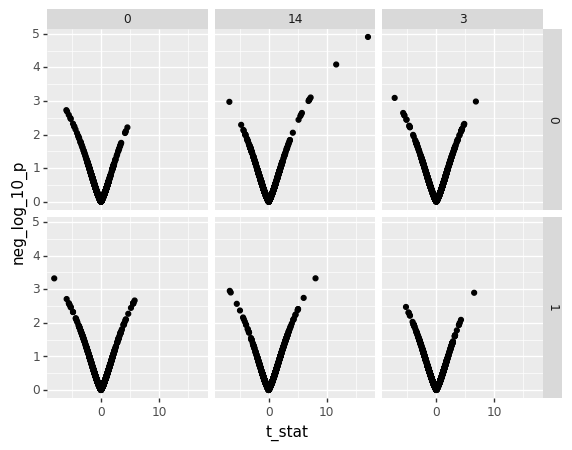

<ggplot: (311772620)>

In [15]:
gg.ggplot(all_results_df, gg.aes(x="t_stat", y="neg_log_10_p")) + \
    gg.facet_grid("FFA~diff_day") + \
    gg.geom_point()